In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
from wordcloud import WordCloud
import string
import nltk

In [2]:
amazon_df = pd.read_csv("amazon_reviews.csv")

In [3]:
amazon_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


<Axes: >

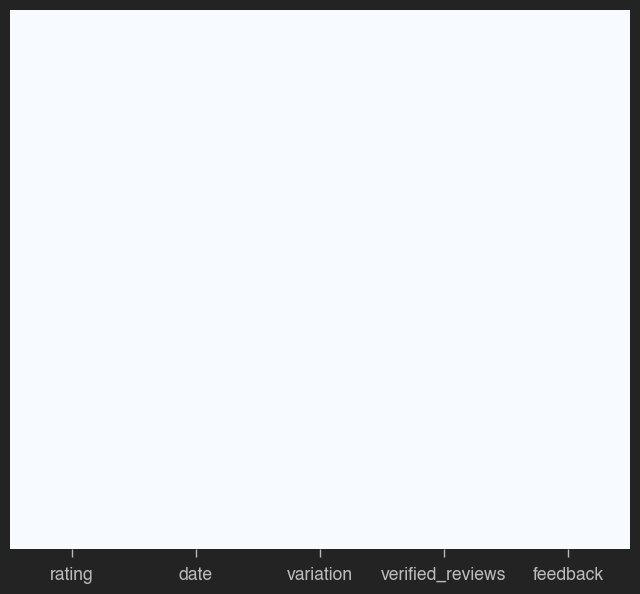

In [4]:
sns.heatmap(amazon_df.isnull(),yticklabels = False,cbar = False,cmap = "Blues")

array([[<Axes: title={'center': 'rating'}>,
        <Axes: title={'center': 'feedback'}>]], dtype=object)

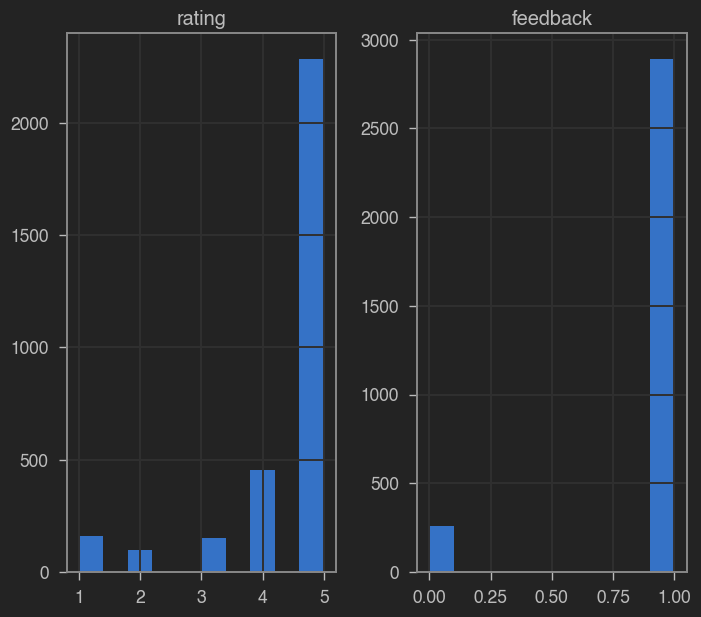

In [5]:
amazon_df.hist()

In [8]:
positive_reviews = amazon_df[amazon_df["feedback"]==0]

In [9]:
negative_reviews = amazon_df[amazon_df["feedback"]==1]

In [10]:
positive_sentences = positive_reviews['verified_reviews'].tolist()
negative_sentences = negative_reviews['verified_reviews'].tolist()

In [15]:
positive_sentences

["It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.",
 'Sound is terrible if u want good music too get a bose',
 'Not much features.',
 "Stopped working after 2 weeks ,didn't follow commands!? Really fun when it was working?",
 'Sad joke. Worthless.',
 'Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.',
 "It's got great sound and bass but it doesn't work all of the time. Its still hot or miss when it recognizes things",
 "I am not super impressed with Alexa. When my Prime lapsed, she wouldn't play anything. She isn't smart enough to differentiate among spotify accounts so we can't use it f

In [16]:
positive_sentences_filtered = [str(sentence) for sentence in positive_sentences if isinstance(sentence, str)]
negative_sentences_filtered = [str(sentence) for sentence in negative_sentences if isinstance(sentence, str)]

positive_string = " ".join(positive_sentences_filtered)
negative_string = " ".join(negative_sentences_filtered)

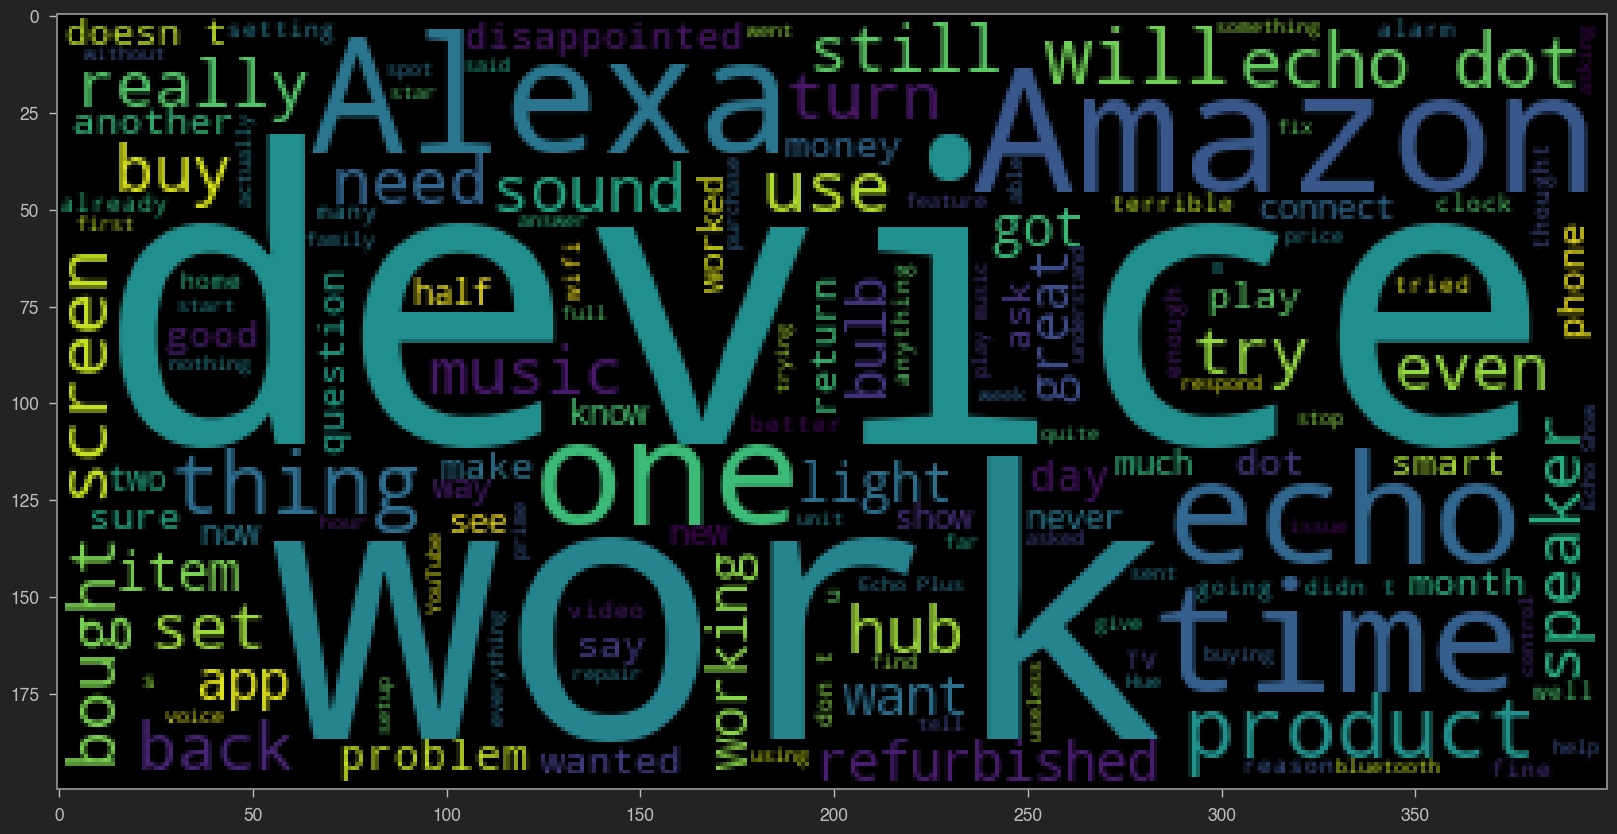

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_string))

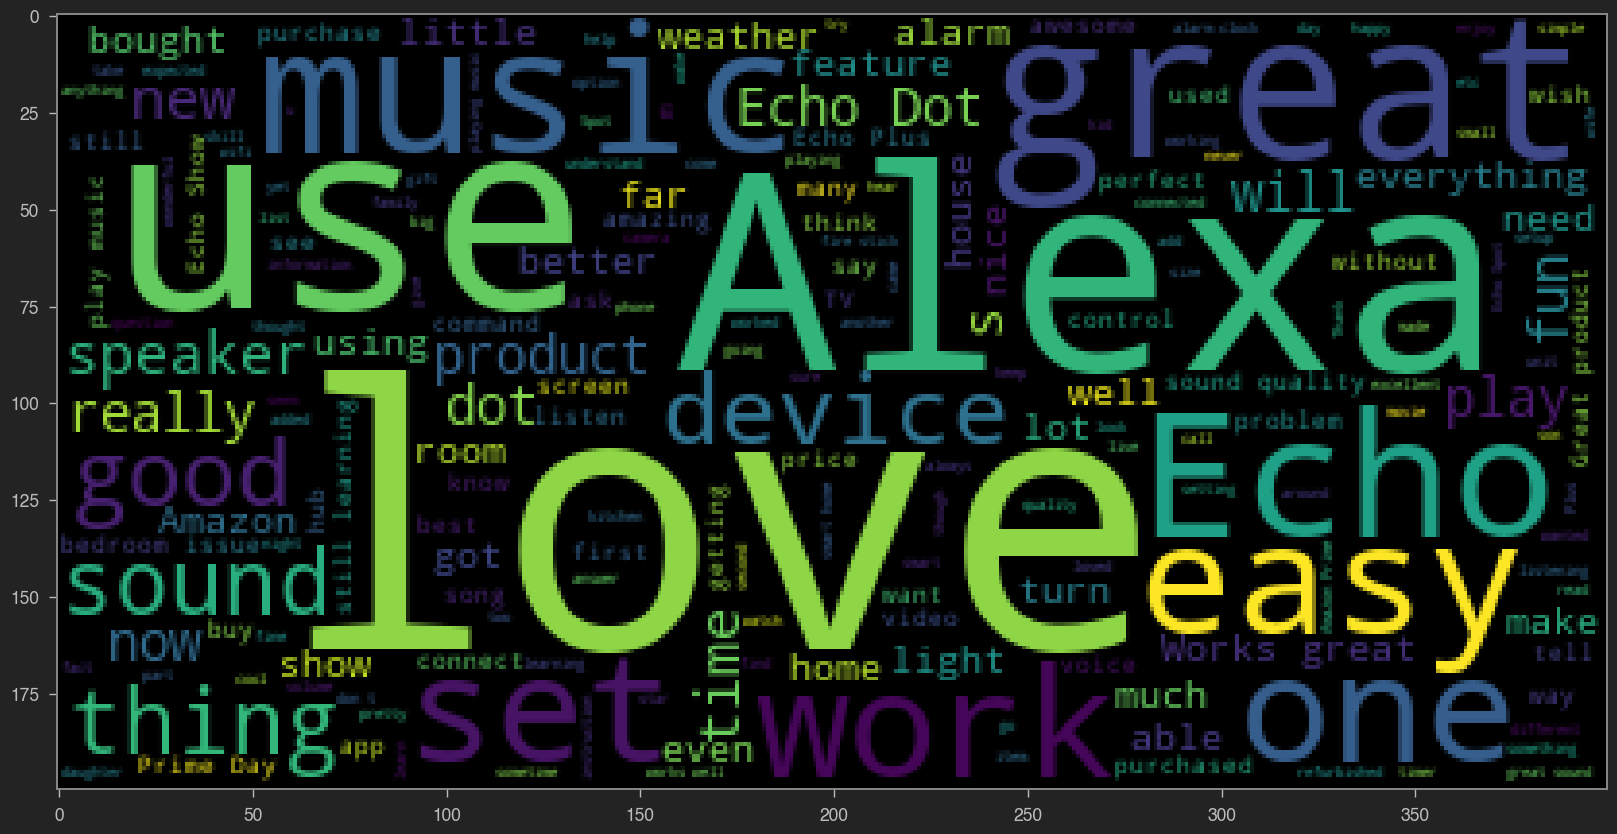

In [18]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_string))

In [19]:
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adityaap/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
amazon_df_cleaned = amazon_df[amazon_df['verified_reviews'].apply(lambda x: isinstance(x, str))]

amazon_df_clean = amazon_df_cleaned['verified_reviews'].apply(message_cleaning)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = message_cleaning, dtype = np.uint8)
amazon_df = amazon_df.dropna(subset=['verified_reviews'])
amazon_countvectorizer = vectorizer.fit_transform(amazon_df['verified_reviews'])

In [26]:
X = pd.DataFrame(amazon_countvectorizer.toarray())

In [27]:
y = amazon_df['feedback']

In [28]:
X.shape

(3149, 5211)

In [29]:
y.shape

(3149,)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [31]:
from sklearn.naive_bayes import MultinomialNB
NB_classified = MultinomialNB()
NB_classified.fit(X_train,y_train)

MultinomialNB()

<Axes: >

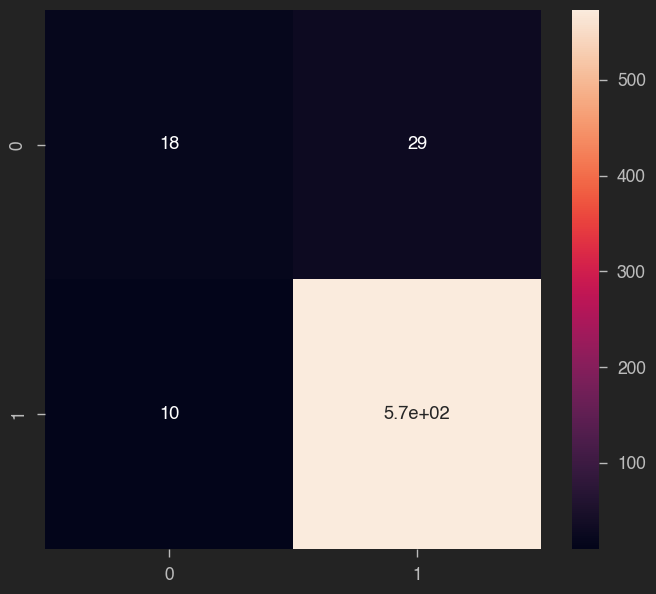

In [32]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = NB_classified.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot = True)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.38      0.48        47
           1       0.95      0.98      0.97       583

    accuracy                           0.94       630
   macro avg       0.80      0.68      0.72       630
weighted avg       0.93      0.94      0.93       630

